# Medical Insurance Cost Prediction

### 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import joblib


### 2: Load Dataset

In [5]:
# Load dataset (correct & GitHub-safe)
df = pd.read_csv("../data/Medical Insurance.csv")



### 3: Select Features and Encode Categorical Variables

In [6]:

# Select input features
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['charges'].values.reshape(-1, 1)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (1338, 8)
Target vector shape: (1338, 1)


### 4: Train–Test Split (80/20)

In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1070, 8) (1070, 1)
Testing set shape: (268, 8) (268, 1)


### 5: Feature Scaling and Intercept Term

In [8]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Add intercept (bias) term
Xb_train = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
Xb_test  = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])


### 6: Hypothesis, Cost Function, and Gradient

In [9]:

def hypothesis(Xb, theta):
    return Xb @ theta


def compute_cost(Xb, y, theta, lam=10):
    m = len(y)
    error = Xb @ theta - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    cost += (lam / (2 * m)) * np.sum(theta[1:] ** 2)  # L2 regularization
    return cost


def gradient(Xb, y, theta, lam=10):
    m = len(y)
    error = Xb @ theta - y
    grad = (1 / m) * (Xb.T @ error)
    grad[1:] += (lam / m) * theta[1:]
    return grad


### 7: Gradient Descent Algorithm

In [10]:

def gradient_descent(Xb, y, alpha=0.01, iters=5000, lam=10):
    theta = np.zeros((Xb.shape[1], 1))
    J_history = []

    for i in range(iters):
        grad = gradient(Xb, y, theta, lam)
        theta -= alpha * grad
        J_history.append(compute_cost(Xb, y, theta, lam))

    return theta, J_history


### 8: Train the Model

In [11]:

theta, J_history = gradient_descent(
    Xb_train,
    y_train,
    alpha=0.01,
    iters=80000,
    lam=0.001
)

print("Final training cost:", J_history[-1])


Final training cost: 18638891.8216042


### 9: Convergence Plot

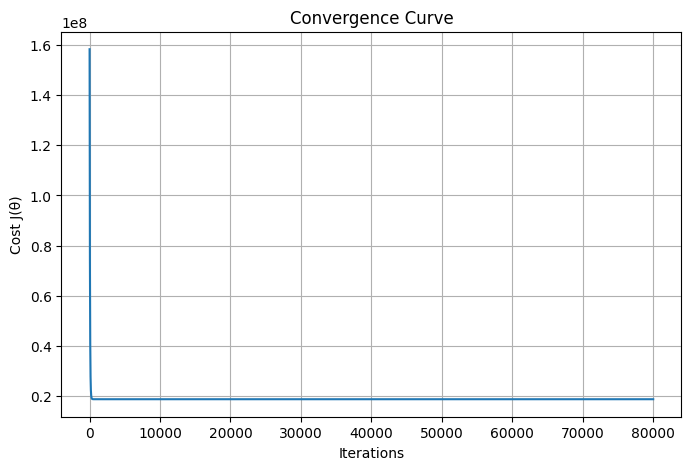

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(J_history)
plt.title("Convergence Curve")
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.grid(True)
plt.show()


### 10: Learned Parameters

In [13]:
print("Final Theta Values:")
print(theta.ravel())

Final Theta Values:
[ 1.33460897e+04  3.61497179e+03  2.03622625e+03  5.16890119e+02
 -9.29242265e+00  9.55847220e+03 -1.58140471e+02 -2.90155432e+02
 -3.49109835e+02]


### 11: Prediction & MSE (From Scratch)

In [14]:

from sklearn.metrics import mean_squared_error

y_pred_gd = Xb_test @ theta
mse_gd = mean_squared_error(y_test, y_pred_gd)

print("MSE (From Scratch):", mse_gd)

MSE (From Scratch): 33596923.81423566


### 12: Compare with scikit-learn Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("MSE (scikit-learn):", mse_lr)

MSE (scikit-learn): 33596915.851361476


### 13: Save Model Artifacts

In [16]:
import joblib

joblib.dump(
    {
        "theta": theta,
        "scaler": scaler,
        "model_sklearn": lr
    },
    "../models/medical_insurance_regression.joblib"
)

print("Model artifacts saved successfully.")

Model artifacts saved successfully.
